In [116]:
#!pip install tensorflow
#!pip install optuna

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.activations import relu, sigmoid

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print('Train: \n')
print(train.columns)
print(train.head())

print('Test: \n')
print(test.columns)
print(test.head())

Train: 

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41',
       'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51',
       'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'categ'],
      dtype='object')
     F1    F2    F3   F4    F5    F6   F7    F8    F9   F10  ...    F49  \
0  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.218   
1  0.32  0.00  0.64  0.0  0.32  0.32  0.0  1.61  0.32  0.64  ...  0.000   
2  0.00  0.46  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
3  0.00  0.00  0.00  0.0  0.00  1.12  0.0  0.00  0.00  0.00  ...  0.000   
4  0.00  0.00  0.46  0.0  0.46  0.00  0.0  0.00  0.00  0.00  ...  0.000   

     F50  F51    F52    F53  F54    F55  F56  F57  categ  
0  0.218  0.0  0.

In [167]:
count = (train['categ']==0).sum()
print("total count of categ == 0: ")
print(count)
print("ratio of 0 : total ")
print(count / train.shape[0])


total count of categ == 0: 
2175
ratio of 0 : total 
0.6039988891974452


In [18]:
y = train.categ
x = train.drop(['categ'], axis = 1)

In [19]:
id_val = test.Id
x_val = test.drop(['Id'], axis = 1)

In [20]:
num_transformer = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((num_transformer, x.columns))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,train_size = 0.75)

x_train_sc = preprocessor.fit_transform(x_train)
x_test_sc = preprocessor.transform(x_test)

In [22]:
preprocessor.fit(x)
x_val_sc = preprocessor.transform(x_val)

In [52]:
x_val

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5
1,0.00,0.26,0.78,0.0,0.26,0.26,0.08,1.04,0.52,1.56,...,0.0,0.096,0.234,0.000,0.358,0.261,0.110,3.554,54,981
2,0.00,0.00,1.21,0.0,0.00,2.43,0.00,0.00,0.00,0.00,...,0.0,0.000,0.211,0.000,0.211,0.000,0.000,1.000,1,11
3,0.00,0.90,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.165,0.165,0.000,6.266,41,94
4,0.00,0.00,0.00,0.0,0.00,0.49,0.00,0.49,0.00,0.00,...,0.0,0.000,0.228,0.000,0.000,0.000,0.000,1.962,5,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.05,0.05,0.40,0.0,0.34,0.00,0.00,0.00,0.57,0.05,...,0.0,0.019,0.099,0.000,0.089,0.079,0.009,4.913,95,1312
996,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,2.000,12,42
997,0.10,0.50,0.60,0.0,0.30,0.20,0.00,0.00,0.10,0.40,...,0.0,0.780,0.037,0.000,5.942,1.334,0.000,5.838,54,724
998,0.00,0.00,0.00,0.0,1.21,0.00,0.00,0.00,0.00,0.00,...,0.0,0.567,0.378,0.000,0.000,0.000,0.000,1.333,3,24


In [176]:
print(train['categ'].mean())
print(y_train.mean())
print(y_test.mean())

0.39600111080255485
0.3959259259259259
0.39622641509433965


In [12]:
input_shape = [x_train.shape[1]]
input_shape

[57]

In [100]:
## --- Preliminary Model --- ##
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience = 5, 
    min_delta = 0.001,
    restore_best_weights = True
)

history = model.fit(
    x_train, y_train, 
    validation_data = (x_test, y_test),
    batch_size = 512, 
    epochs = 200, 
    callbacks = [early_stopping]
)

Epoch 1/200
6/6 [==============================] - 2s 55ms/step - loss: 0.5791 - binary_accuracy: 0.7189 - val_loss: 0.4828 - val_binary_accuracy: 0.8713
Epoch 2/200
6/6 [==============================] - 0s 18ms/step - loss: 0.2872 - binary_accuracy: 0.8926 - val_loss: 0.3937 - val_binary_accuracy: 0.8857
Epoch 3/200
6/6 [==============================] - 0s 16ms/step - loss: 0.2533 - binary_accuracy: 0.9022 - val_loss: 0.3572 - val_binary_accuracy: 0.8835
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.2339 - binary_accuracy: 0.9115 - val_loss: 0.3390 - val_binary_accuracy: 0.8812
Epoch 5/200
6/6 [==============================] - 0s 18ms/step - loss: 0.2067 - binary_accuracy: 0.9211 - val_loss: 0.3259 - val_binary_accuracy: 0.8768
Epoch 6/200
6/6 [==============================] - 0s 16ms/step - loss: 0.1997 - binary_accuracy: 0.9285 - val_loss: 0.3151 - val_binary_accuracy: 0.8779
Epoch 7/200
6/6 [==============================] - 0s 15ms/step - loss: 0.19

<AxesSubplot:title={'center':'Accuracy'}>

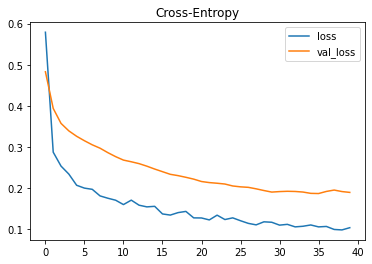

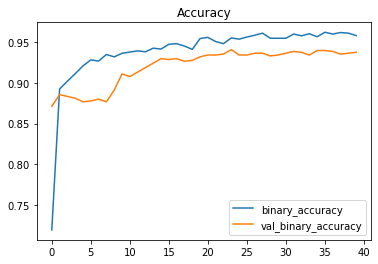

In [101]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot(title="Cross-Entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title = 'Accuracy')

In [13]:
def predTransform(pred):
    pred1 = np.ravel(pred)
    return np.where(pred1 < 0.5, 0, 1)
def get_mae(y_true, pred):
    pred = predTransform(pred)
    return mean_absolute_error(y_true,pred)

In [102]:
pred = model.predict(x_test)
pred = predTransform(pred)
score = accuracy_score(y_test,pred)
print(score)

29/29 [==============================] - 0s 2ms/step
0.9400665926748057


In [32]:
### --- Model Revision --- ###
#num nodes, size layers, activ func
#batch size, num epochs 
#def create_model(hidden_layers, nodes, dropout):
#    model = keras.Sequential()
#    model.add(layers.BatchNormalization(input_shape=[57]))
#    for layer in layers:
#        model.add(layers.Dense(nodes, activation='relu'))
#        model.add(layers.BatchNormalization())
#        model.add(layers.Dropout(dropout))
#    model.add(layers.Dense(1, activation='sigmoid'))
#    model.compile(optimizer = 'adam',
#             loss = 'binary_crossentropy',
#             metrics = ['binary_accuracy'])
#    return model

#model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=256, verbose=0)
#param_grid = {'lay': [[1], [2, 3]], 'nodes': [128, 256, 512], 'dropout': [0.2, 0.3]}
#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
#grid_result = grid.fit(x_train, y_train)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#grid_result = grid.fit(x_train, y_train)
#model = KerasClassifier(build_fn=create_model, verbose=0)

In [23]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience = 10, 
    min_delta = 0.001,
    restore_best_weights = True
)

history = model.fit(
    x_train_sc, y_train, 
    validation_data = (x_test_sc, y_test),
    batch_size = 512, 
    epochs = 1000, 
    callbacks = [early_stopping],
    #verbose = 0
)

Epoch 1/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.7726 - binary_accuracy: 0.5552 - val_loss: 0.6674 - val_binary_accuracy: 0.6238
Epoch 2/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6716 - binary_accuracy: 0.6407 - val_loss: 0.5877 - val_binary_accuracy: 0.6992
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.5913 - binary_accuracy: 0.7107 - val_loss: 0.5240 - val_binary_accuracy: 0.7647
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5264 - binary_accuracy: 0.7733 - val_loss: 0.4747 - val_binary_accuracy: 0.8024
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4795 - binary_accuracy: 0.7974 - val_loss: 0.4354 - val_binary_accuracy: 0.8335
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4449 - binary_accuracy: 0.8252 - val_loss: 0.4032 - val_binary_accuracy: 0.8524
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0

Epoch 54/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.1730 - binary_accuracy: 0.9359 - val_loss: 0.1874 - val_binary_accuracy: 0.9345
Epoch 55/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.1700 - binary_accuracy: 0.9378 - val_loss: 0.1862 - val_binary_accuracy: 0.9356
Epoch 56/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.1709 - binary_accuracy: 0.9381 - val_loss: 0.1855 - val_binary_accuracy: 0.9356
Epoch 57/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.1723 - binary_accuracy: 0.9363 - val_loss: 0.1848 - val_binary_accuracy: 0.9356
Epoch 58/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.1689 - binary_accuracy: 0.9370 - val_loss: 0.1839 - val_binary_accuracy: 0.9367
Epoch 59/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.1689 - binary_accuracy: 0.9393 - val_loss: 0.1833 - val_binary_accuracy: 0.9367
Epoch 60/1000
6/6 [==============================] - 0s 10ms/step

Epoch 107/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1340 - binary_accuracy: 0.9504 - val_loss: 0.1569 - val_binary_accuracy: 0.9434
Epoch 108/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.1356 - binary_accuracy: 0.9526 - val_loss: 0.1560 - val_binary_accuracy: 0.9456
Epoch 109/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.1349 - binary_accuracy: 0.9530 - val_loss: 0.1553 - val_binary_accuracy: 0.9467
Epoch 110/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.1361 - binary_accuracy: 0.9489 - val_loss: 0.1548 - val_binary_accuracy: 0.9456
Epoch 111/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1320 - binary_accuracy: 0.9515 - val_loss: 0.1561 - val_binary_accuracy: 0.9456
Epoch 112/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.1337 - binary_accuracy: 0.9537 - val_loss: 0.1558 - val_binary_accuracy: 0.9434
Epoch 113/1000
6/6 [==============================] - 0s 8

<AxesSubplot:title={'center':'Accuracy'}>

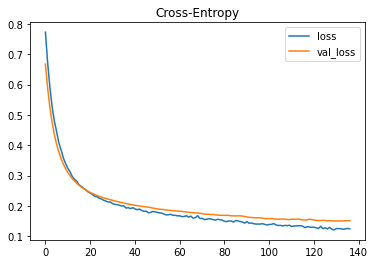

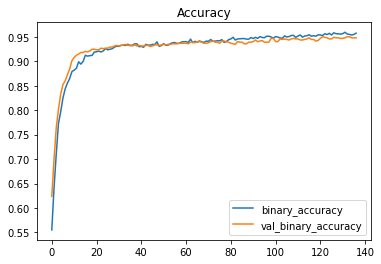

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot(title="Cross-Entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title = 'Accuracy')

In [26]:
pred = model.predict(x_test)
pred = predTransform(pred)
score = accuracy_score(y_test,pred)
print(score)

29/29 [==============================] - 0s 1ms/step
0.5227524972253053


In [27]:
pred = model.predict(x_val)
pred = predTransform(pred)

32/32 [==============================] - 0s 1ms/step


In [28]:
pred.mean()

0.889

In [110]:
output = pd.DataFrame({'Id' : id_val, 'Predicted' : pred})
output
#output.to_csv('submission4.csv', index = False)

In [29]:
##-- trying Random Forest and XGBOOST --##
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def RandomForest_mae(x_train, x_test, y_train, y_test):
    model = RandomForestRegressor(random_state=0)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = mean_absolute_error(y_test, pred)
    return error

def xgboost_mae(x_train, x_test, y_train, y_test):
    model = XGBRegressor(n_estimators=500)
    model.fit(x_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(x_test,y_test)],
             verbose=False)
    predictions = model.predict(x_test)
    error = mean_absolute_error(y_test, predictions)
    return error

In [30]:
model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [33]:
pred = predTransform(pred)

In [34]:
pred.mean()

0.38179800221975585

In [36]:
error_rf = mean_absolute_error(y_test, pred)
print(error_rf)

0.05438401775804662


In [39]:
score_rf = accuracy_score(y_test,pred)
print(score_rf)

0.9456159822419534


In [41]:
model = XGBRegressor(n_estimators=500)
model.fit(x_train, y_train,
          early_stopping_rounds=5,
          eval_set=[(x_test,y_test)],
          verbose=False)
predictions = model.predict(x_test)
predictions = predTransform(predictions)
error_xgb = mean_absolute_error(y_test, predictions)
print(error_xgb)
score_xgb = accuracy_score(y_test,predictions)
print(score_xgb)

0.05549389567147614
0.9445061043285239


C:\Users\natha\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [54]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier( random_state=0)
model_rf.fit(x_train,y_train)
pred = model_rf.predict(x_test)
pred = predTransform(pred)
score_rfc = accuracy_score(y_test,pred)
print(score_rfc)

0.9489456159822419


In [56]:
pred = model_rf.predict(x_val)
pred = predTransform(pred)
output = pd.DataFrame({'Id' : id_val, 'Predicted' : pred})
output

,Id,Predicted
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
995,996,1
996,997,0
997,998,1
998,999,0


In [57]:
#output.to_csv('submission5.csv', index = False)

In [58]:
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [61]:
### RandomForestClassifier Hyperparameter Tuning ###
from sklearn.model_selection import GridSearchCV

#RandomForest model 
model = RandomForestClassifier(random_state=0)

#parameters
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

grid = GridSearchCV(estimator=model, param_grid=parameters, verbose=1, cv = 3)

grid.fit(x_train, y_train)


print("Best parameters:", grid.best_params_)


#***** Output *****#
#Fitting 5 folds for each of 24 candidates, totalling 120 fits
#Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}

#Fitting 3 folds for each of 36 candidates, totalling 108 fits
#Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
model_tune = RandomForestClassifier(random_state=0, 
                              criterion = "entropy",
                              max_depth = None,
                              max_features = "auto", 
                              min_samples_leaf = 1,
                              min_samples_split = 2, 
                              n_estimators = 200)
model_tune.fit(x_train, y_train)
pred = model_tune.predict(x_test)
pred = predTransform(pred)
score_final = accuracy_score(y_test, pred)
print(score_final)

0.9522752497225305


In [64]:
pred = model_tune.predict(x_val)
pred = predTransform(pred)
output = pd.DataFrame({'Id' : id_val, 'Predicted' : pred})
output

,Id,Predicted
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
995,996,1
996,997,0
997,998,1
998,999,0


In [65]:
#output.to_csv('submission6.csv', index = False)